<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch04_04_%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9CEDA_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.04. 분류문제 EDA - titanic
---
* 날짜:
* 이름:

## 학습내용
    - titanic 데이터 EDA
    - 분류문제 에서의 탐색적 데이터 분석 진행


## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [1]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* seaborn에서 제공하는 `titanic` 데이터셋을 불러오기

In [3]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

* 데이터셋 일부 확인

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [78]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [79]:
df.isnull().sum() # isnull 도 가능

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 결측지 비율 확인

In [8]:
df.isnull().mean()*100
# deck의 결측치가 상당히 많다.
# 전처리 해줄때 삭제

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* 숫자 자료형의 기술 통계

In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 숫자 자료형 외의 기술 통계

In [11]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [12]:
df.describe(include='category')

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


In [13]:
df.describe(include='bool')

,adult_male,alone
count,891,891
unique,2,2
top,True,True
freq,537,537


* 숫자 자료형 외 값 및 개수 확인

In [14]:
for col in ['sex', 'embarked', 'who', 'embark_town', 'alive', 'class', 'deck', 'adult_male', 'alone']:
  print(col)
  print(df[col].value_counts())

sex
male      577
female    314
Name: sex, dtype: int64
embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
who
man      537
woman    271
child     83
Name: who, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
alive
no     549
yes    342
Name: alive, dtype: int64
class
Third     491
First     216
Second    184
Name: class, dtype: int64
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
adult_male
True     537
False    354
Name: adult_male, dtype: int64
alone
True     537
False    354
Name: alone, dtype: int64


### **| 변수 요약**

* 속성을 그리기전 bool 값을 가지는 속성 `adult_male`과 `alone`을 int 값으로 변환해야 합니다.

In [16]:
df['adult_male'] = df['adult_male'].astype('int64')

In [18]:
df['alone'] = df['alone'].astype('int64')

In [19]:
df.info()
# adult_male, alone 의 데이터 타입이 정수로 바뀌었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int64   
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    int64   
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


* 모든 속성의 분포 간단히 그리기

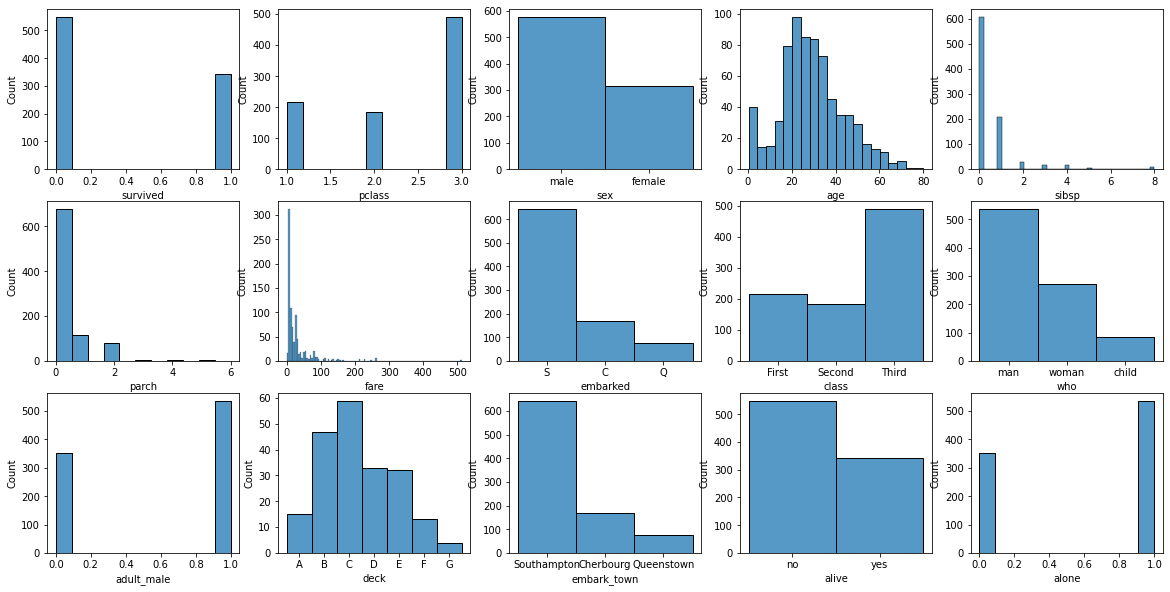

In [26]:
f, axes = plt.subplots(3,5, figsize=(20,10))
axes = axes.flatten()
for col, ax in zip(df.columns,axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [29]:
nums = ['age','fare']
noms = ['sex','sibsp','parch','class','who','adult_male','deck','embark_town','alone']
y = 'alive'
print('연속형자료', nums)
print('이산형/범주형자료', noms)
print('예측할변수', y)

연속형자료 ['age', 'fare']
이산형/범주형자료 ['sex', 'sibsp', 'parch', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']
예측할변수 alive


* 데이터 정리하기
  * 데이터 소개: 타이타닉 승객들의 다양한 정보
  * 자료형 소개
    * 연속형
      * age: 승객들의 연령
      * fare: 표의 가격
    * 이산/범주 형
      * sex : 성별
      * sibsp: 같이 승선한 형제자매 또는 배우자의 수
      * parch: 같이 승선한 부모, 자식의 수
      * class: 티켓 등급(1등급, 2등급, 3등급)
      * who: 남,여, 어린이 구분
      * adult_male: 성인 남성 구분
      * deck: 선실 번호
      * embark_town: 승선 항구이름
      * alone: 혼자 탔는가
  * 모델링을 위한 자료형 구분:
    * 위와 동일함



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

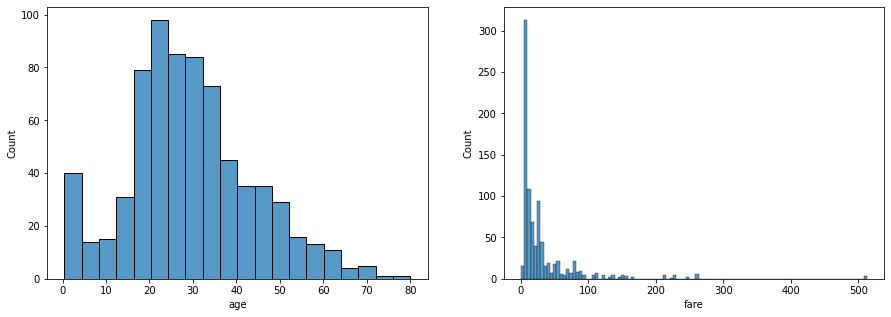

In [32]:
f, axes = plt.subplots(1,len(nums), figsize=(15,5))
axes = axes.flatten()                         
for col, ax in zip(nums, axes):
  sns.histplot(data = df, x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

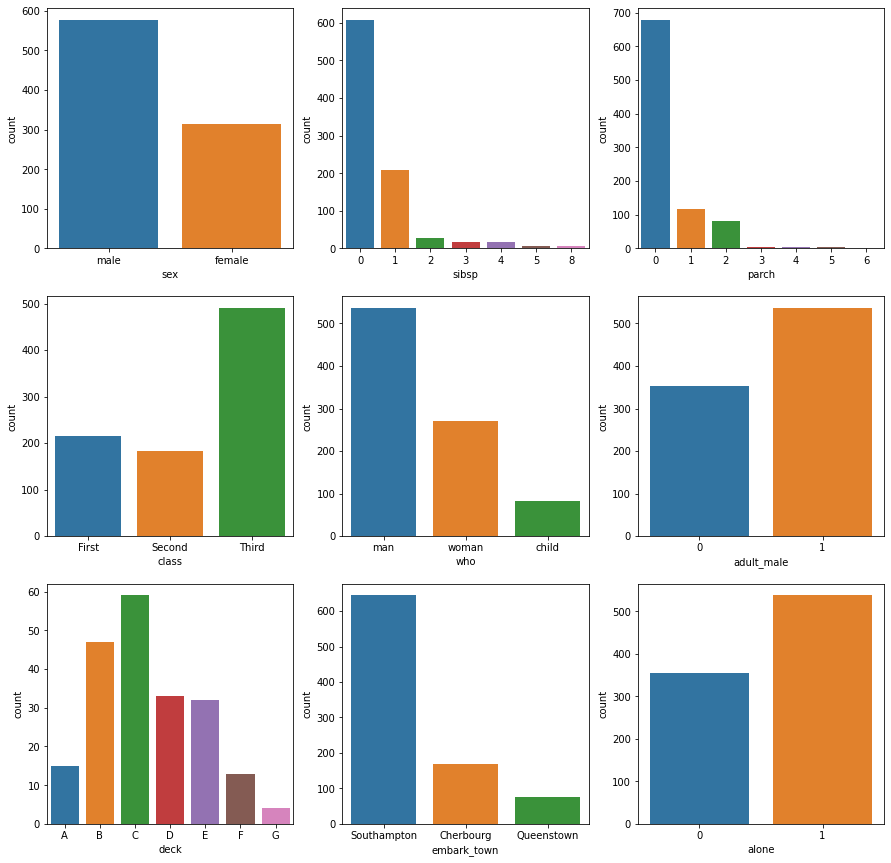

In [77]:
f, axes = plt.subplots(3,3, figsize=(15,15))
axes = axes.flatten()                         
for col, ax in zip(noms, axes):
  sns.countplot(data = df, x=col, ax=ax) 
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [42]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


* boxplot 으로 연속 자료형 기술 통계 시각화하기

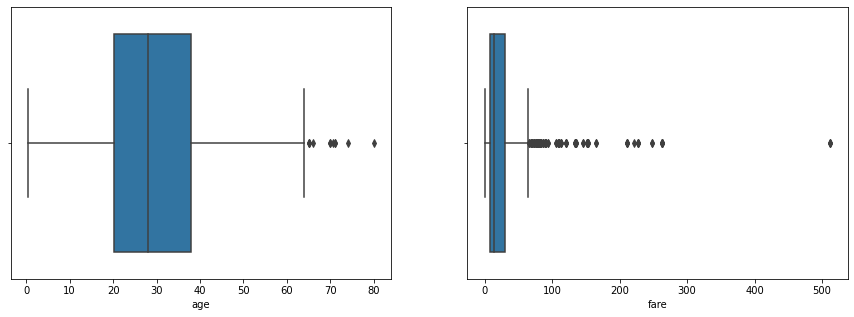

In [48]:
f, axes = plt.subplots(1,len(nums), figsize=(15,5))
axes = axes.flatten()                         
for col, ax in zip(nums, axes):
  sns.boxplot(data = df, x=col, ax=ax) 
plt.show()
# 요금에 이상치가 상당히 많다. 소수의 몇명만 높은 가격으로 높은 클래스의 표를 샀으니 자연스러운 현상.

* viloinplot 으로 연속 자료형 기술 통계 시각화하기

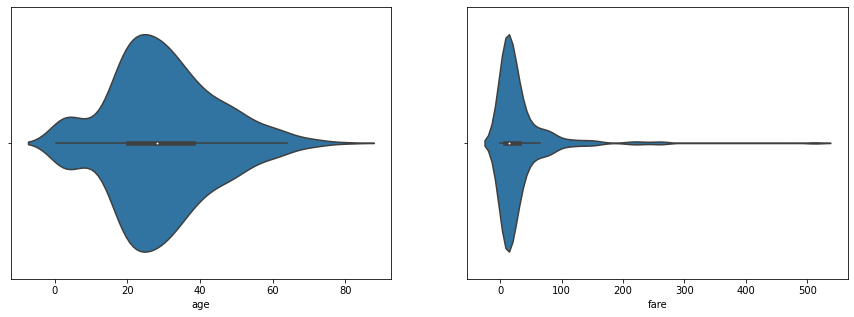

In [47]:
f, axes = plt.subplots(1,len(nums), figsize=(15,5))
axes = axes.flatten()                         
for col, ax in zip(nums, axes):
  sns.violinplot(data = df, x=col, ax=ax) 
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [49]:
df.skew()
# 나이의 경우 분포가 고르게 잘 되어있다.
# 요금의 경우 분포가 고르지 않다. 왼쪽으로 쏠려있다. -> 스케일링 필요
# 하지만 소수의 인원이 상위 클래스의 티켓을 비싸게 주고 사기 때문에 그래프의 치우침은 자연스러운 현상이다.
# sibsp 의 왜도도 높다 치우침이 왼쪽으로 쏠려있는 이유는 형제 자매나 배우자랑 같이 온 승객보다 혼자온 승객이 많기 때문이다.
# parch 도 sibsp와 동일한 경향을 보인다 즉 혼자 승선한 승객들이 많다는 것을 보여준다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

* `kurt` 이용해 첨도 구하기

In [50]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `countplot`으로 그리기


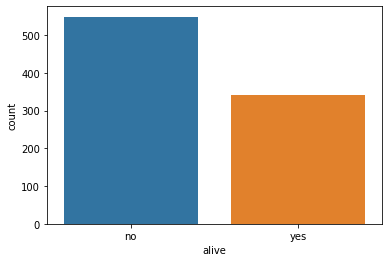

In [51]:
sns.countplot(data=df,x=y)
# 생존자가 사망자의 절반정도에 미친다.

* `hue` 옵션에 범주형 속성 추가하기

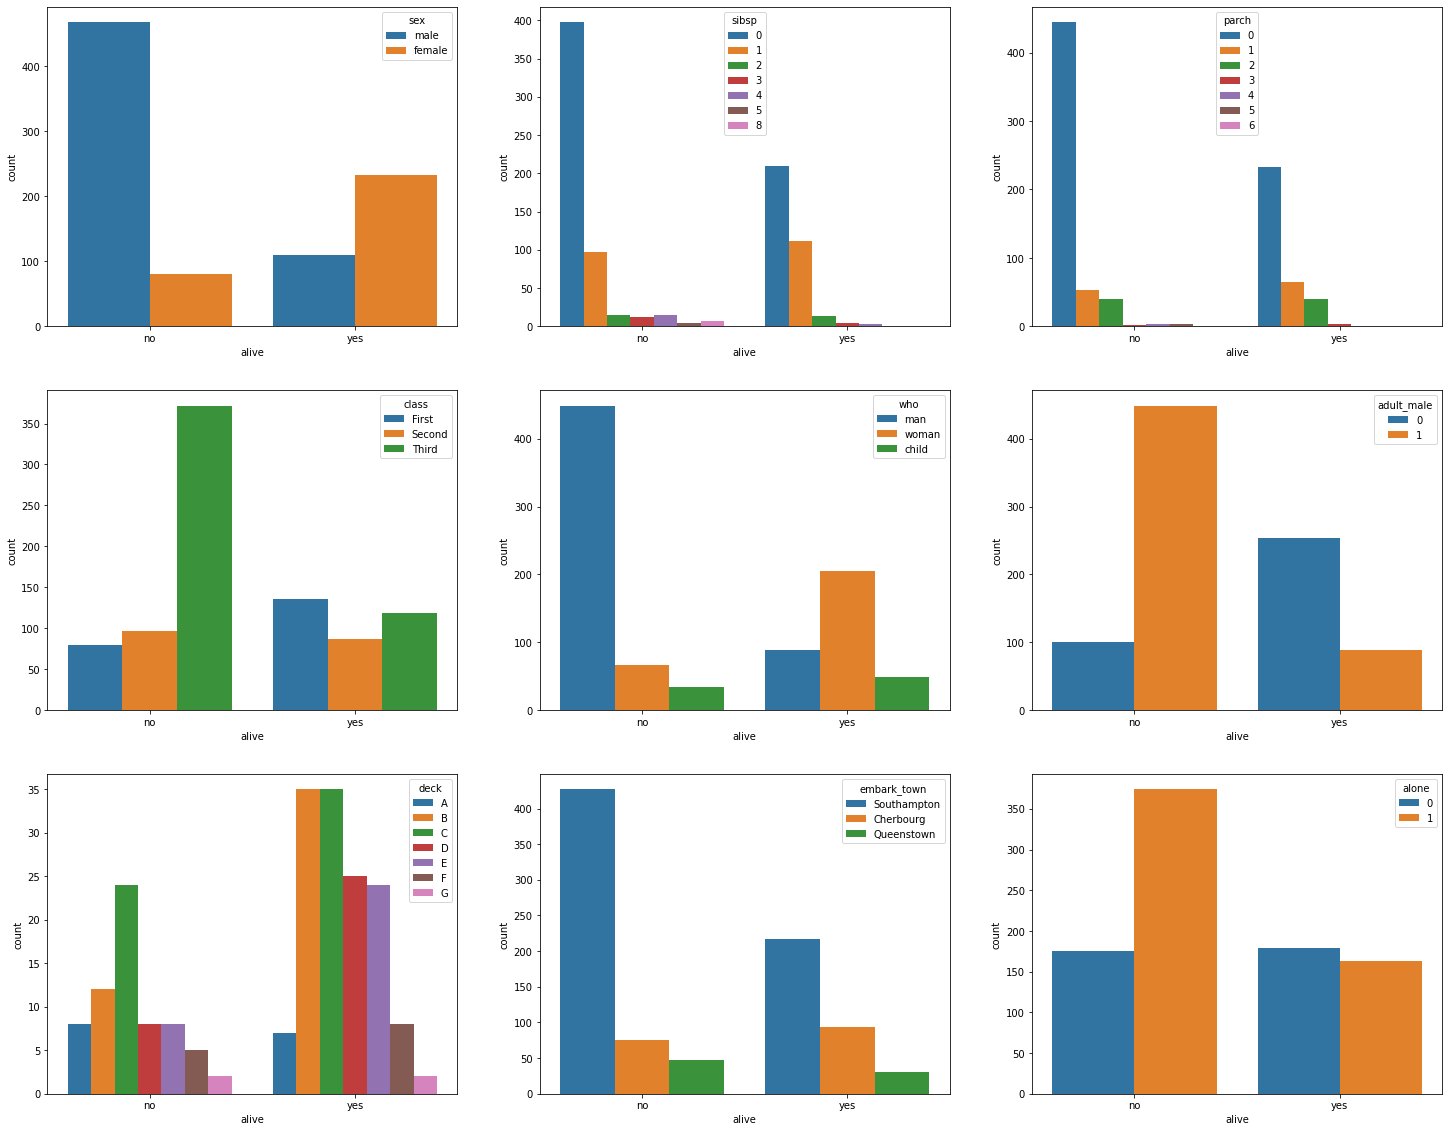

In [55]:
f, axes = plt.subplots(3,3, figsize=(25,20))
axes = axes.flatten()                         
for nom, ax in zip(noms, axes):
  sns.countplot(data = df, x=y, ax=ax, hue=nom) 
plt.show()

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [56]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [58]:
df.corr().style.background_gradient()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

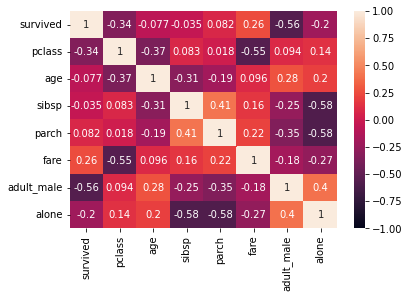

In [59]:
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)

* 상관관계가 높은 속성 정리하기




In [ ]:
# 성인 남성의 여부는 생존과 음의 상관관계를 지니고 있다.
# 요금과 티켓 클래스는 음의 상관관계를 지니고 있다.
# 같이 탑승한 형제 자매 또는 배우자의 수와 혼자 탑승했는지의 여부는 음의 상관관계를 지닌다.
# 같이 탑승한 부모, 자식의 여부와 혼자 탑승했는지의 여부는 음의 상관관계를 지닌다.

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

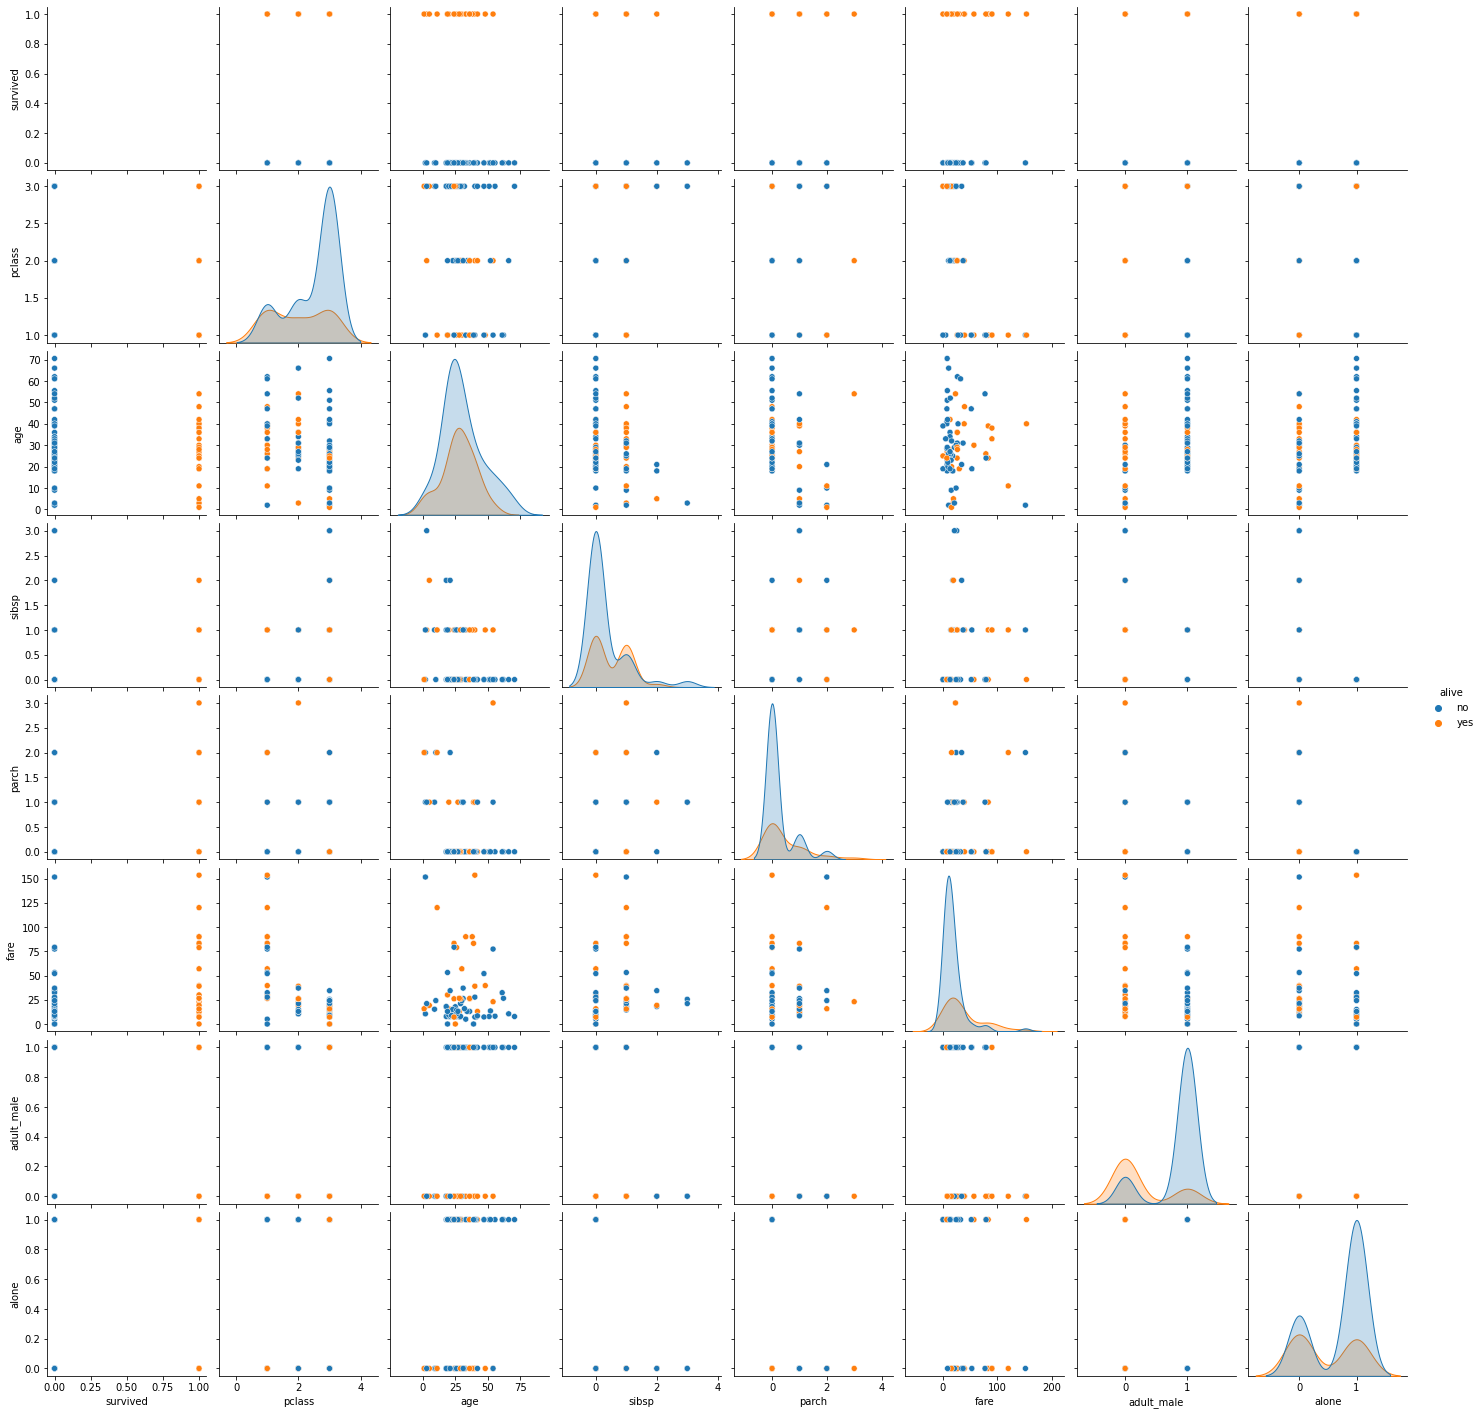

In [61]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
_=sns.pairplot(df.sample(100), hue=y)

* `displot` 이용해 연속 자료형 별 예측값의 분포 `kde` 선으로 시각화 하기 

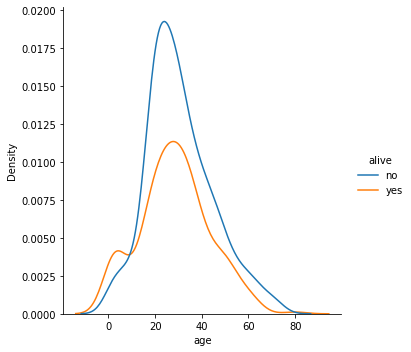

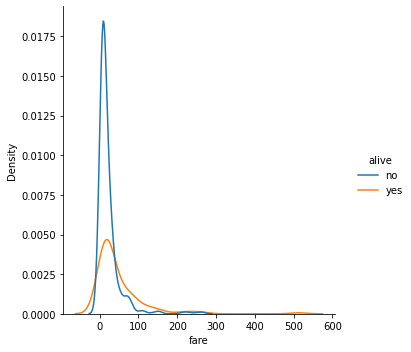

In [62]:
for col in nums:
  sns.displot(data=df, x=col, kind='kde', hue=y)
  plt.show()

* 위에서 그린 플롯에 `col` 옵션으로 `sex` 추가하기

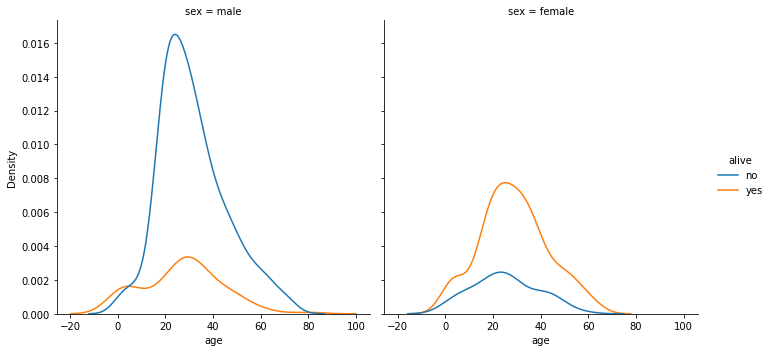

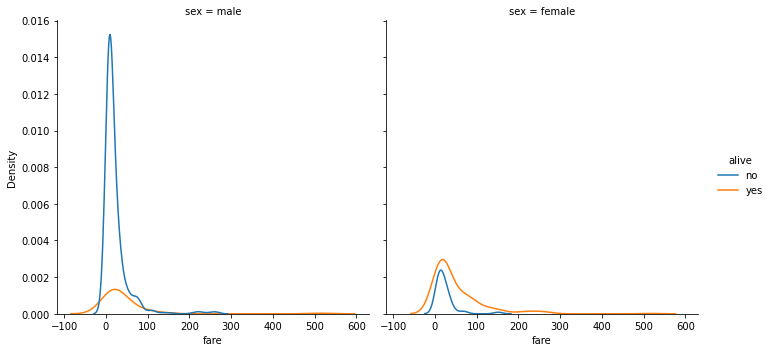

In [63]:
for col in nums:
  sns.displot(data=df, x=col, kind='kde', hue=y, col='sex')
  plt.show()

* 위에서 그린 플롯에 `hue` 옵션으로 `class` 추가하기

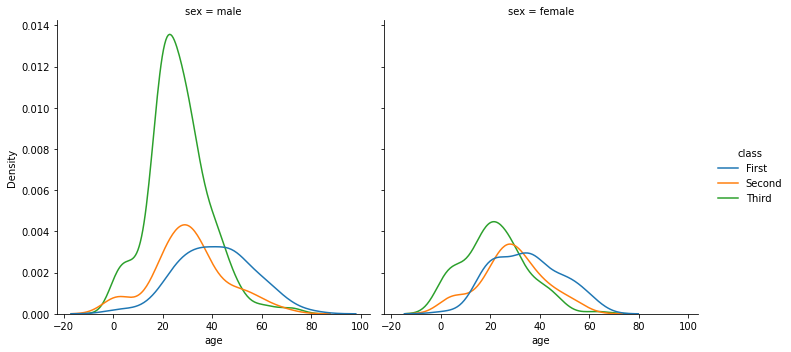

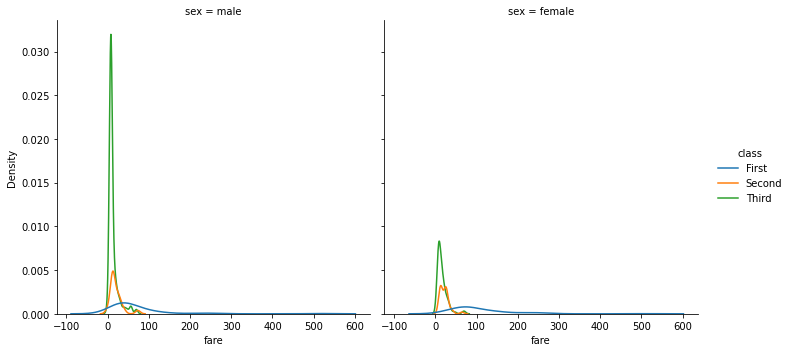

In [64]:
for col in nums:
  sns.displot(data=df, x=col, kind='kde', hue='class', col='sex')
  plt.show()

* `age`과 `fare`의 산점도를 그리고 `hue`옵션에 예측값 추가하기

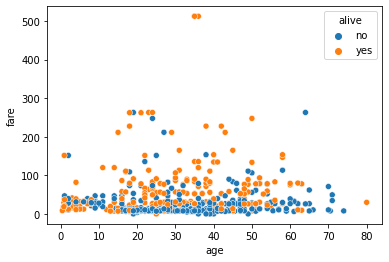

In [65]:
sns.scatterplot(data=df, x='age',y='fare', hue=y)
# 대체적으로 낮은 요금 (표의 등급을 뜻하기도 함)을 낸 사람들중에 사망자가 많았다.

* `lmplot`을 이용해 위의 산점도를 다시 그리고 `col` 옵션에 `class` 추가하기

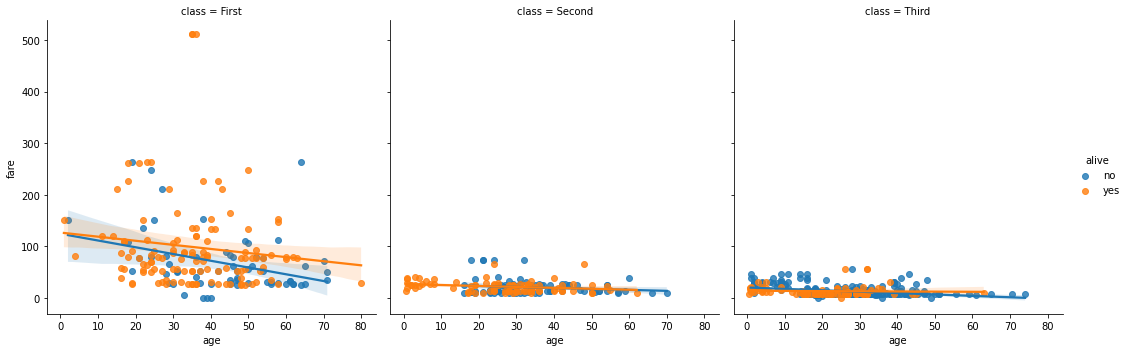

In [67]:
sns.lmplot(data=df, x='age',y='fare', hue=y, col='class')

* `histplot`으로 범주형 속성들과 예측값 히트맵 그리기

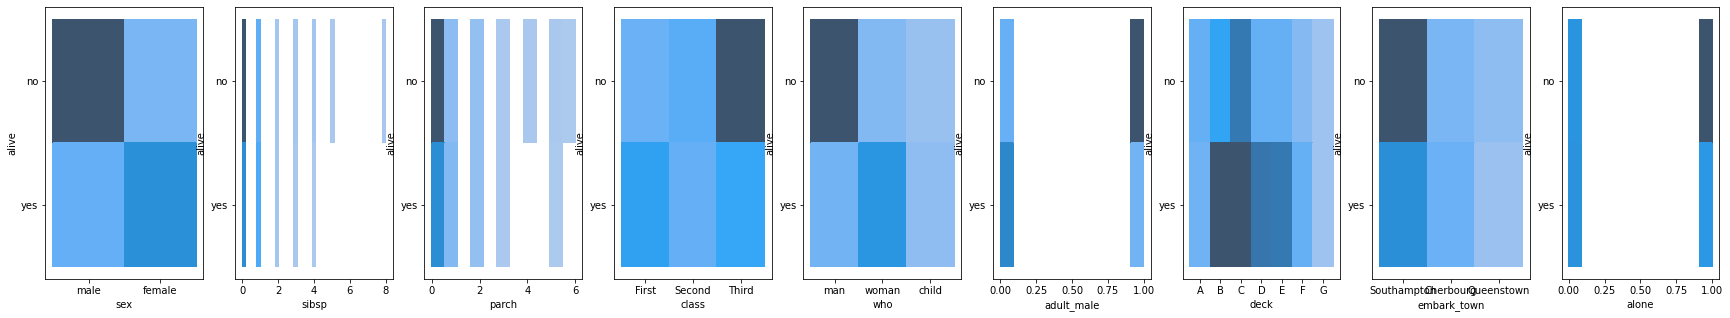

In [73]:
fig, axes = plt.subplots(1,len(noms), figsize=(30,5))
for col, ax in zip(noms, axes):
  _=sns.histplot(data=df, x=col, y=y, ax=ax)